In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing  import LabelEncoder
import matplotlib.pyplot as plt
import nltk

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lab02R05Pc36\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df = pd.read_csv("spam.csv",encoding='ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

# Data Preprocessing 
    1- Data Cleaning
    2- EDA 
    3- Text Preprocessing
    

### 1- Data Cleaninig

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop unnecessary columns
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True,axis=1)

In [8]:
df.sample(5)

,v1,v2
4315,ham,"I can't speak, bcaz mobile have problem. I can..."
4223,ham,Double eviction this week - Spiral and Michael...
2084,ham,How are you. Wish you a great semester
3876,ham,"Sorry sir, i will call you tomorrow. senthil...."
1067,ham,Meeting u is my work. . . Tel me when shall i ...


In [9]:
# renaming columns 
df = df.rename(columns={'v1':'target','v2':"text"})

In [10]:
df.sample(5)

,target,text
2727,ham,Whatsup there. Dont u want to sleep
2661,ham,Do you know when dad will be back?
5046,ham,Hmmm.still we dont have opener?
5110,spam,You have 1 new message. Please call 08715205273
2973,ham,"I'll text carlos and let you know, hang on"


In [11]:
df.target.unique()

array(['ham', 'spam'], dtype=object)

In [12]:
#Classification - Binary Classfication

In [13]:
encoder = LabelEncoder()
df.target = encoder.fit_transform(df.target)

In [14]:
df.head(10)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [15]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
df.duplicated().sum()

403

In [17]:
df = df.drop_duplicates(keep="first")

In [18]:
df.shape

(5169, 2)

In [19]:
df.duplicated().sum()

0

### 2. Exploratory Data Analysis (EDA)

In [20]:
label_counts = df.target.value_counts()
label_counts

0    4516
1     653
Name: target, dtype: int64

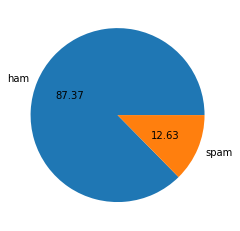

In [21]:
plt.pie(label_counts, labels=['ham','spam'],autopct="%.02f")
plt.show()

In [22]:
df['number_of_char']=df['text'].apply(len)
df.head()

,target,text,number_of_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
df['number_of_words']=df['text'].apply(lambda x:len(x.split(" ")))
df.head()

,target,text,number_of_char,number_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [24]:
df['number_of_sentences']=df['text'].apply(lambda x:len(x.split(".")))
df.head()

,target,text,number_of_char,number_of_words,number_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9
1,0,Ok lar... Joking wif u oni...,29,6,7
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,7
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [25]:
# number of words using tokenization
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df

,target,text,number_of_char,number_of_words,number_of_sentences,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9,24
1,0,Ok lar... Joking wif u oni...,29,6,7,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,37
3,0,U dun say so early hor... U c already then say...,49,11,7,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,15
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,30,5,35
5568,0,Will Ì_ b going to esplanade fr home?,37,8,1,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,10,5,15
5570,0,The guy did some bitching but I acted like i'd...,125,26,1,27


In [27]:
df = df.drop('number_of_words',axis=1)

In [28]:
# number of words using tokenization
df['num_sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head(10)

,target,text,number_of_char,number_of_sentences,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,9,24,2
1,0,Ok lar... Joking wif u oni...,29,7,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,2
3,0,U dun say so early hor... U c already then say...,49,7,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,2,39,4
6,0,Even my brother is not like to speak with me. ...,77,3,18,2
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,2,31,2
8,1,WINNER!! As a valued network customer you have...,158,4,32,5
9,1,Had your mobile 11 months or more? U R entitle...,154,1,31,3


In [30]:
df.iloc[0]['text']

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [31]:
df = df.drop('number_of_sentences',axis=1)

In [32]:
df

,target,text,number_of_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [33]:
# stats behind all new added columns
df[['number_of_char','num_words','num_sent']].describe()

,number_of_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
# stats behind all new added columns in spam
df[df['target']==1][['number_of_char','num_words','num_sent']].describe()

,number_of_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [35]:
# stats behind all new added columns in ham
df[df['target']==0][['number_of_char','num_words','num_sent']].describe()

,number_of_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
import seaborn as sns 

<AxesSubplot:xlabel='number_of_char', ylabel='Count'>

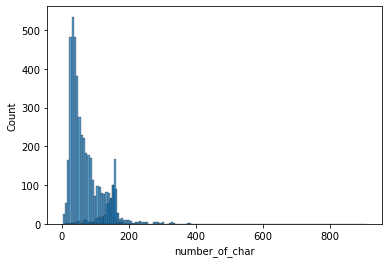

In [37]:
sns.histplot(df[df['target']==0]['number_of_char'])
sns.histplot(df[df['target']==1]['number_of_char'])

<AxesSubplot:xlabel='num_words', ylabel='Count'>

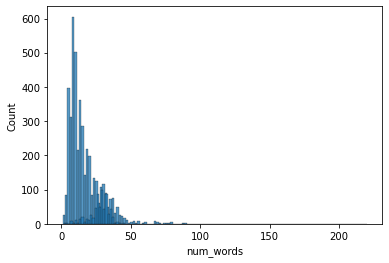

In [38]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'])

In [39]:
df.corr()

,target,number_of_char,num_words,num_sent
target,1.000000,0.384717,0.262969,0.267602
number_of_char,0.384717,1.000000,0.965784,0.626118
num_words,0.262969,0.965784,1.000000,0.680882
num_sent,0.267602,0.626118,0.680882,1.000000


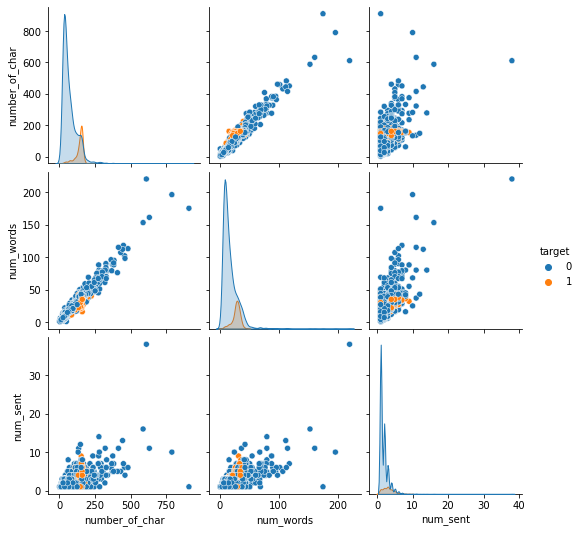

In [40]:
sns.pairplot(df,hue='target')

multicolinerity
multicolinerity

<AxesSubplot:>

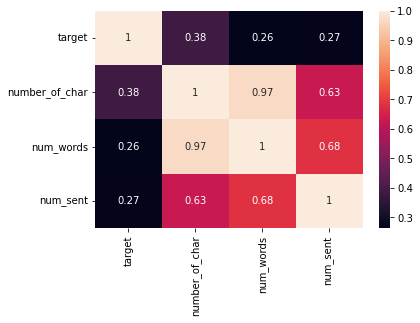

In [41]:
sns.heatmap(df.corr(),annot=True)

# data preprocessing

In [42]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lab02R05Pc36\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

https://www.geeksforgeeks.org/removing-stop-words-nltk-python/#:~:text=Stop%20Words%3A%20A%20stop%20word,result%20of%20a%20search%20query.&text=To%20check%20the%20list%20of,commands%20in%20the%20python%20shell.

In [43]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [44]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
  
example_sent = """This is a sample sentence,
                  showing off the stop words filtration."""
  
stop_words = set(stopwords.words('english'))
  
word_tokens = word_tokenize(example_sent)
  
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
  
filtered_sentence = []
  
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
  
print(word_tokens)
print(filtered_sentence)

['This', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.']
['This', 'sample', 'sentence', ',', 'showing', 'stop', 'words', 'filtration', '.']


In [45]:

stopwords = stopwords.words('english')

In [46]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [47]:
import string
punc=string.punctuation
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

stemming/limtiazation

https://en.wikipedia.org/wiki/Stemming

https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html

https://www.questionpro.com/blog/pearson-correlation-coefficient/
https://ppt-online.org/456926


In [48]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
ps = PorterStemmer()

In [49]:
def text_tranform(text):
    text=text.lower()
    y=[]
    text=nltk.word_tokenize(text)
    
    for word in text:
        if word.isalnum() and (word not in stopwords) and (word not in punc):
            y.append(ps.stem(word))
    text=y[:]
    y.clear()
    return ' '.join(text)

In [50]:
text_tranform('hi  i am good boy ! what about you buddy studying')

'hi good boy buddi studi'

In [51]:
text_tranform

<function __main__.text_tranform(text)>

In [52]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [59]:
import string
punctuation = string.punctuation

In [60]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

NameError: name 'text' is not defined

In [61]:
def text_transformer(text):
   # 1. Converting all text in lower case!
    text = text.lower()
   # 2.  Using the concept of Tokenization!
    y  = []
    text = nltk.word_tokenize(text)
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

   # 3.  Removing all special characters!
   # 4. Removing all stop-words punctuation!
    
    for i in text:
        if (i not in punctuation) & (i not in stopwords):
            y.append(i)
    text = y[:]
    y.clear()
    
    # 5. Apply stemming!
    
    for i in text:
        y.append(ps.stem(i))
    return ' '.join(y)

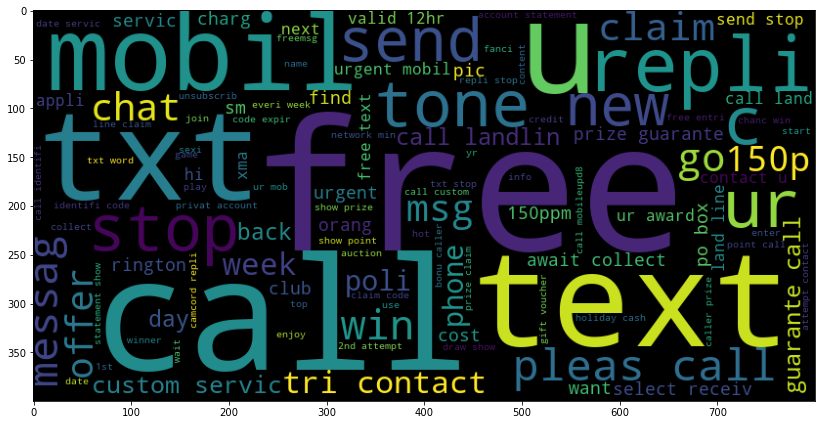

In [63]:
df['transformed_text'] = df.text.apply(text_transformer)
import wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=800, height=400, min_font_size=10, background_color='black')
spam_word_cloud = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))
plt.figure(figsize=(14, 10))
plt.imshow(spam_word_cloud)

https://www.nltk.org/howto/corpus.html
The corpora with NLTK

In [70]:
spam_corpus=[]
for message_text in df[df.target == 1]['transformed_text'].to_list():
    for word in message_text.split():
        spam_corpus.append(word)
    

In [73]:
from collections import Counter
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [74]:
top_50_Frequency = pd.DataFrame(Counter(spam_corpus).most_common(50))

top_50_Frequency.sample(5)

,0,1
16,tone,63
26,win,48
39,cs,35
46,want,31
7,mobil,114


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

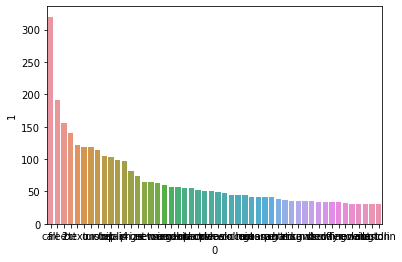

In [75]:
sns.barplot(top_50_Frequency[0], top_50_Frequency[1])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


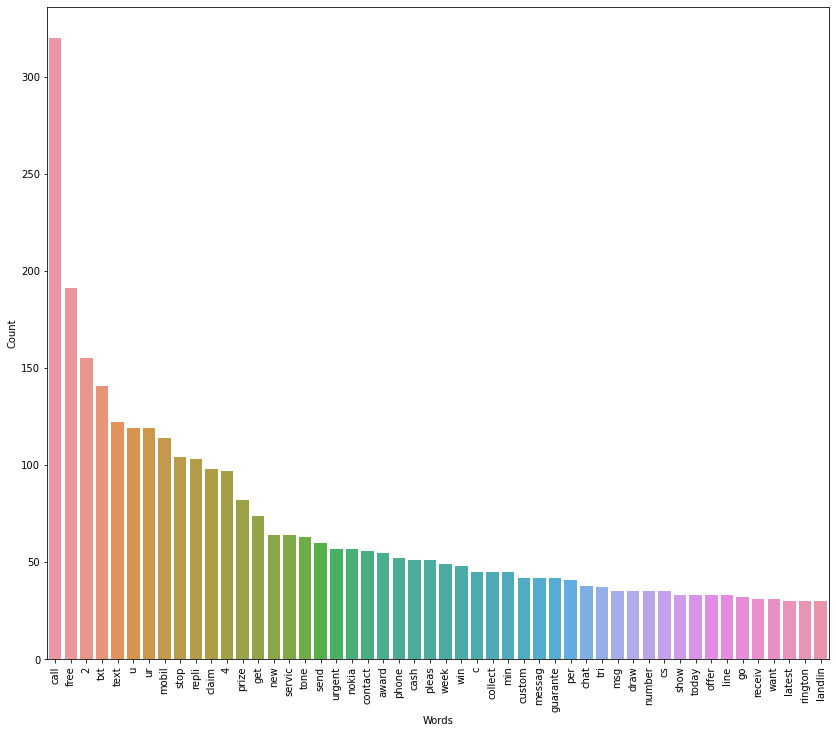

In [76]:
plt.figure(figsize=(14,12))
sns.barplot(top_50_Frequency[0], top_50_Frequency[1])
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

In [79]:
spam_corpus_0 = []
for message_text in df[df.target == 0]['transformed_text'].to_list():
    for i in message_text.split():
        spam_corpus_0.append(i)

top_50_Frequency_0 = pd.DataFrame(Counter(spam_corpus_0).most_common(50))

In [ ]:
import pandas as pd


In [ ]:
credits